## Create the dataset

In [2]:
import deeptrack as dt 
from numpy.random import uniform

image_size = 51

particle1 = dt.Sphere(
    position=lambda: uniform(image_size / 2 - 5, image_size / 2 + 5, size=2),
    radius = 1e-7,
)

particle2 = dt.Ellipse(
            intensity=0.2,
            position_unit="pixel",
            position=lambda: uniform(3 * image_size / 4 - 5, 3 * image_size / 4 + 5, size=2),
            radius=(1e-6, 0.2e-6),
        )

...add image optics...

In [3]:
optics = dt.Fluorescence(output_region=(0, 0, image_size, image_size))

...wich we combine in a simulation pipeline

In [4]:
import torch

simulation = (
    optics(particle2 >> particle1)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

Create datasets

In [5]:
train_dataset = dt.pytorch.Dataset(simulation & particle1.position, length=100)
test_dataset = dt.pytorch.Dataset(simulation & particle1.position & particle2.position, length=5)

Plot the data

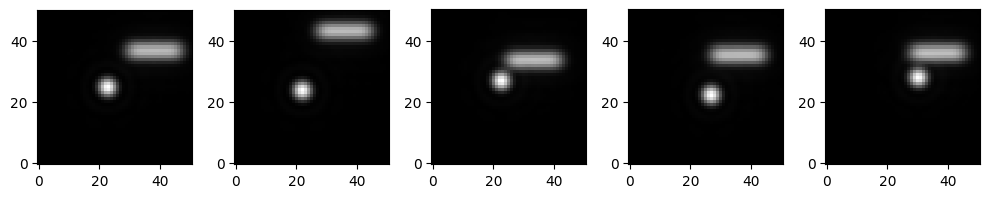

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(5):
	image, position1, position2 = test_dataset[int(i)]
	plt.subplot(1, 5, i + 1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

## Image segmentation CNN